In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from flask import Flask, jsonify

In [34]:
path = "sqlite:///Resources/hawaii.sqlite"
engine = create_engine(path)
conn = engine.connect()

In [35]:
inspector = inspect(engine)

tables = inspector.get_table_names()
tables

['measurement', 'station']

In [36]:
for table in tables:
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
    
    # or put it as a dataframe
    display(pd.DataFrame(columns))
    
    print()

measurement

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0



station

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


#Part1

In [37]:
query = """
        SELECT
            *
        FROM
            station
        LIMIT 10;
    """
pd.read_sql(query,conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [38]:
query = """
        SELECT
            *
        FROM
            measurement
        LIMIT 10;
    """
pd.read_sql(query,conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [39]:
query = """
        SELECT
            max(date)
        FROM
            measurement
    """
engine.execute(query).fetchall()

[('2017-08-23',)]

In [40]:
query = """
        SELECT
            cast(cast(substr(max(date),1,4)as integer) - 1 as text) || substr(max(date),5) as max_date
        FROM
            measurement
        """
engine.execute(query).fetchall()

[('2016-08-23',)]

In [41]:
query = """
        SELECT
            date,
            sum(prcp) as prcp
        FROM
           measurement
        WHERE
            date >=(
                    SELECT
                        cast(cast(substr(max(date),1,4)as integer) - 1 as text) || substr(max(date),5) as max_date
                    FROM
                        measurement
                )
        GROUP BY
            date;
        """
df = pd.read_sql(query,conn)
df.head()

,date,prcp
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   prcp    366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [43]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   prcp    366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


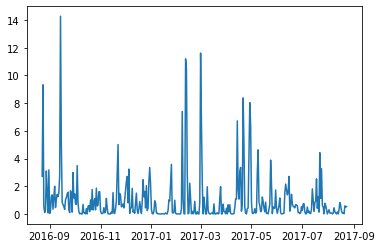

In [44]:
plt.plot(df["date"], df["prcp"])
plt.show()

In [45]:
query = """
        SELECT
            date,
            avg(prcp) as prcp
        FROM
            measurement
        WHERE
            date >= (
                    SELECT
                        cast(cast(substr(max(date),1, 4) as integer) - 1 as text) || substr(max(date),5) as max_date
                    FROM
                        measurement
                )
        GROUP BY
            date
        ORDER BY
            date;
        """
df = pd.read_sql(query, conn)
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


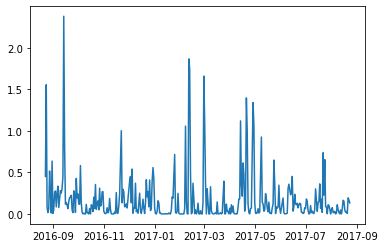

In [46]:
plt.plot(df["date"], df["prcp"])
plt.show()

#Part2

In [47]:
query = """
        SELECT
            count(station)
        FROM
            station;
    """
engine.execute(query).fetchall()

[(9,)]

In [48]:
query = """
        SELECT
            s.station,
            s.name,
            count(m.id) as observations
        FROM
            measurement m
            JOIN station s on m.station = s.station
        GROUP BY
            s.station,
            s.name
        ORDER BY
            observations desc;
        """
pd.read_sql(query,conn)

,station,name,observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [49]:
query = """
        SELECT
            station,
            min(tobs) as min_temp,
            max(tobs) as max_temp,
            avg(tobs) as avg_temp
        FROM
            measurement
        WHERE
            station = 'USC00519281';
        """
pd.read_sql(query,conn)

,station,min_temp,max_temp,avg_temp
0,USC00519281,54.0,85.0,71.663781


In [50]:
query = """
        SELECT
        station,
          date,
          tobs
        FROM
            measurement
        where
            date >= '2016-08-23'
        and station = 'USC00519281'
        order by
            date asc
        """

df2 = pd.read_sql(query, conn)
df2["date"] = pd.to_datetime(df2["date"])
df2.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


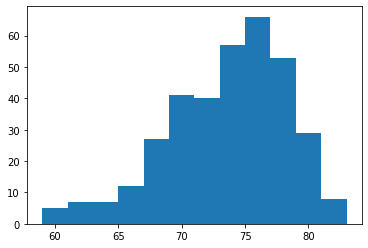

In [51]:
plt.hist(df2.tobs, bins=12)
plt.show() 